This notebooks explores two main datasets, thta is the BTC-USD dataset and the USD dataset.
All other cryptocoins are not explored here but the conparisons here and information gathered are extended onto
the other coins. Preprocessing methods are also done in the main file "coin_compass.py" for all coins.
This notebook is simply a test of the datasets and model.

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly
import yfinance as yf

### Load Datasets

In [36]:
btc = pd.read_csv("C:/Users/user1/Downloads/DATA SCIENCE/Project/Re-Try/data/BTC-USD.csv")

In [37]:
usd = pd.read_csv("C:/Users/user1/Downloads/DATA SCIENCE/Project/Re-Try/data/USD.csv",index_col=0, parse_dates=True)

In [5]:
usd.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-10-01,94.047,94.320,94.405,94.000,22.85K,-0.20%
2021-09-30,94.240,94.345,94.520,94.120,33.91K,-0.12%
2021-09-29,94.353,93.730,94.440,93.685,31.45K,0.61%
2021-09-28,93.780,93.405,93.820,93.360,36.70K,0.43%
2021-09-27,93.381,93.305,93.495,93.195,21.08K,0.05%


In [6]:
btc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-29,41064.984375,42545.257813,40829.667969,41564.363281,41564.363281,3.060236e+10
2021-09-30,41551.269531,44092.601563,41444.582031,43790.894531,43790.894531,3.114168e+10
2021-10-01,43816.742188,48436.011719,43320.023438,48116.941406,48116.941406,4.285064e+10
2021-10-02,48137.468750,48282.062500,47465.496094,47711.488281,47711.488281,3.061435e+10
2021-10-03,47792.492188,47902.402344,47196.386719,47860.683594,47860.683594,3.137089e+10


### Preprocessing and Exploring Datasets

In [7]:
btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1.458000e+03
mean,15521.563395,15961.673505,15038.820785,15549.956317,15549.956317,2.376612e+10
std,14959.520015,15417.086506,14428.339040,14979.413764,14979.413764,2.135563e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,9.069280e+08
25%,6795.929077,6959.936645,6663.557617,6793.028686,6793.028686,6.736888e+09
50%,9219.190430,9371.618164,9041.197754,9231.572754,9231.572754,1.880204e+10
75%,14093.300049,14676.300293,13455.372803,14150.727051,14150.727051,3.409758e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [8]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2017-10-03 to 2021-10-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1458 non-null   float64
 1   High       1458 non-null   float64
 2   Low        1458 non-null   float64
 3   Close      1458 non-null   float64
 4   Adj Close  1458 non-null   float64
 5   Volume     1458 non-null   float64
dtypes: float64(6)
memory usage: 80.0 KB


In [9]:
btc_sub = btc.drop(btc.columns[[0,1,2,4]], axis=1)
btc_sub.tail()

,Close,Volume
Date,,
2021-09-29,41564.363281,3.060236e+10
2021-09-30,43790.894531,3.114168e+10
2021-10-01,48116.941406,4.285064e+10
2021-10-02,47711.488281,3.061435e+10
2021-10-03,47860.683594,3.137089e+10


In [10]:
#displaying usd dataframe
usd_sub = usd.drop(usd.columns[[1,2,3,4,5]], axis=1)
usd_sub.head()

,Price
Date,
2021-10-01,94.047
2021-09-30,94.240
2021-09-29,94.353
2021-09-28,93.780
2021-09-27,93.381


In [11]:
join = btc_sub
for x in join.index.values:
    for x2 in usd_sub.index.values:
        if x == x2:
            itemindex = np.where(usd_sub.index==x2)[0][0]
            val = usd_sub.at[x2, "Price"]
            join.at[x, 'Price'] = val
join.head()

,Close,Volume,Price
Date,,,
2017-10-03,4317.479980,1.288020e+09,93.414
2017-10-04,4229.359863,1.116770e+09,93.284
2017-10-05,4328.410156,1.161770e+09,93.803
2017-10-06,4370.810059,1.069940e+09,93.641
2017-10-07,4426.890137,9.069280e+08,NaN


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

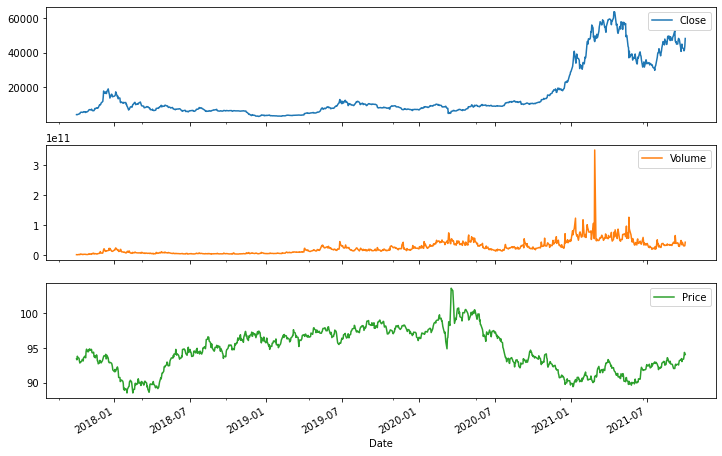

In [12]:
join = join.dropna()
join.plot(subplots=True, figsize=(12,8))

In [13]:
# Correlation
join.corr()

,Close,Volume,Price
Close,1.000000,0.669851,-0.525999
Volume,0.669851,1.000000,-0.199464
Price,-0.525999,-0.199464,1.000000


<AxesSubplot:>

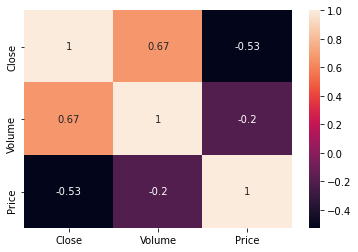

In [14]:
# Heatmap
sns.heatmap(join.corr(), annot= True)

### Forecasting

In [43]:
btc_close = btc.drop(btc.columns[[1,2,3,5,6]], axis=1)
btc_close.head()

,Date,Close
0,2017-10-03,4317.479980
1,2017-10-04,4229.359863
2,2017-10-05,4328.410156
3,2017-10-06,4370.810059
4,2017-10-07,4426.890137


In [44]:
btc_vol = btc.drop(btc.columns[[1,2,3,4,5]], axis=1)
btc_vol.head()

,Date,Volume
0,2017-10-03,1.288020e+09
1,2017-10-04,1.116770e+09
2,2017-10-05,1.161770e+09
3,2017-10-06,1.069940e+09
4,2017-10-07,9.069280e+08


Prophet accepts 2 attribtes that is 'ds' and 'y'. Now I rename my selected columns that is:
1. date and close are renamed to ds and y for btc_close
2. date and volume are renamed to ds and y for btcc_vol

In [45]:
btc_close = btc_close.rename(columns={"Date": "ds", "Close": "y"})
btc_vol = btc_vol.rename(columns={"Date":"ds", "Volume":"y"})
btc_close.head()

,ds,y
0,2017-10-03,4317.479980
1,2017-10-04,4229.359863
2,2017-10-05,4328.410156
3,2017-10-06,4370.810059
4,2017-10-07,4426.890137


In [46]:
m = Prophet(daily_seasonality=True)
m.fit(btc_close)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [ ]:
forecast.tail()

In [ ]:
plot_plotly(m, forecast)